In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 


In [66]:
rides = pd.read_csv('average monthly rides.csv',index_col = 'Month',parse_dates = True)
rides.shape

(115, 1)

In [67]:
rides.head()

,"Portland Oregon average monthly bus ridership (/100) January 1973 through June 1982, n=114"
Month,
1960-01,648
1960-02,646
1960-03,639
1960-04,654
1960-05,630


In [68]:
#renaming the column
rides.columns = ['average_rides']

In [69]:
rides.tail()

,average_rides
Month,
1969-03,1419
1969-04,1432
1969-05,1394
1969-06,1327
Portland Oregon average monthly bus ridership (/100) January 1973 through June 1982,n=114


In [70]:
#deleting the last row of the data
rides.drop('Portland Oregon average monthly bus ridership (/100) January 1973 through June 1982',inplace = True)

In [71]:
import datetime
from dateutil.relativedelta import relativedelta
start = datetime.datetime.strptime("1960-01-01", "%Y-%m-%d")
date_list = [start + relativedelta(months=x) for x in range(0,114)]
rides['index'] = date_list
rides.set_index(['index'],inplace= True)
rides.index.name = None

In [8]:
date_list

[datetime.datetime(1960, 1, 1, 0, 0),
 datetime.datetime(1960, 2, 1, 0, 0),
 datetime.datetime(1960, 3, 1, 0, 0),
 datetime.datetime(1960, 4, 1, 0, 0),
 datetime.datetime(1960, 5, 1, 0, 0),
 datetime.datetime(1960, 6, 1, 0, 0),
 datetime.datetime(1960, 7, 1, 0, 0),
 datetime.datetime(1960, 8, 1, 0, 0),
 datetime.datetime(1960, 9, 1, 0, 0),
 datetime.datetime(1960, 10, 1, 0, 0),
 datetime.datetime(1960, 11, 1, 0, 0),
 datetime.datetime(1960, 12, 1, 0, 0),
 datetime.datetime(1961, 1, 1, 0, 0),
 datetime.datetime(1961, 2, 1, 0, 0),
 datetime.datetime(1961, 3, 1, 0, 0),
 datetime.datetime(1961, 4, 1, 0, 0),
 datetime.datetime(1961, 5, 1, 0, 0),
 datetime.datetime(1961, 6, 1, 0, 0),
 datetime.datetime(1961, 7, 1, 0, 0),
 datetime.datetime(1961, 8, 1, 0, 0),
 datetime.datetime(1961, 9, 1, 0, 0),
 datetime.datetime(1961, 10, 1, 0, 0),
 datetime.datetime(1961, 11, 1, 0, 0),
 datetime.datetime(1961, 12, 1, 0, 0),
 datetime.datetime(1962, 1, 1, 0, 0),
 datetime.datetime(1962, 2, 1, 0, 0),
 datet

In [72]:
rides['average_rides'] =rides['average_rides'].astype('int')

In [73]:
rides.dtypes

average_rides    int32
dtype: object

In [74]:
rides.head()

,average_rides
1960-01-01,648
1960-02-01,646
1960-03-01,639
1960-04-01,654
1960-05-01,630


In [75]:
rides.describe()

,average_rides
count,114.000000
mean,1120.543860
std,270.888317
min,613.000000
25%,885.000000
50%,1158.000000
75%,1340.000000
max,1558.000000


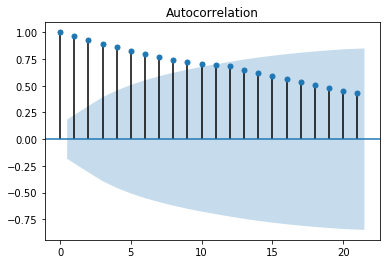

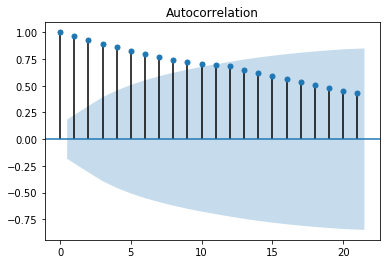

In [77]:
plot_acf(rides)

In [13]:
#function to perform rolling stats and dickey fuller test
from statsmodels.tsa.stattools import adfuller
def rides_stationarytest(data):
    plt.figure(figsize = (10,8))
    plt.plot(data,color = 'blue',label = 'original')
    rides_rollingmean = data.rolling(window = 12).mean()
    plt.plot(rides_rollingmean,color = 'red',label = 'rolling_mean')
    rides_rollingstd = data.rolling(window = 12).std()
    plt.legend(loc = 'best')
    plt.plot(rides_rollingstd,color = 'black',label = 'rolling_Std')
    plt.legend(loc = 'best')
    series = data.loc[:, 'average_rides'].values
    result = adfuller(series, autolag='AIC')
    dfout = pd.Series(result[0:4],index = ['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key, value in result[4].items():
        dfout['Critial Value %s'%key] = value
    print(dfout)
        





C:\Users\user\Anaconda4\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


Test Statistic                  -1.536597
p-value                          0.515336
#Lags Used                      12.000000
Number of Observations Used    101.000000
Critial Value 1%                -3.496818
Critial Value 5%                -2.890611
Critial Value 10%               -2.582277
dtype: float64


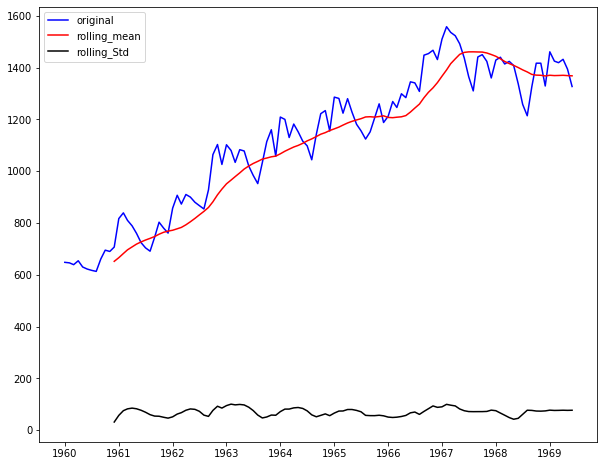

In [14]:
rides_stationarytest(rides)

Test Statistic                  -1.938696
p-value                          0.314082
#Lags Used                      11.000000
Number of Observations Used    101.000000
Critial Value 1%                -3.496818
Critial Value 5%                -2.890611
Critial Value 10%               -2.582277
dtype: float64


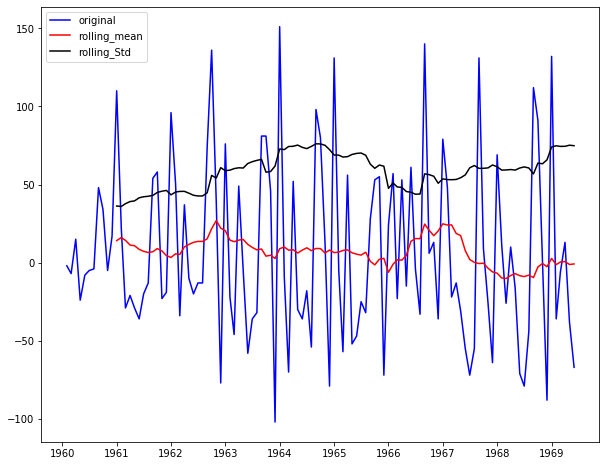

In [15]:
#performing first order differencing to check for stationarity
rides_diff = rides.diff(periods =1)
rides_diff.dropna(inplace=True)
rides_stationarytest(rides_diff)

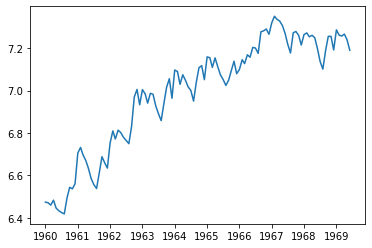

In [16]:
#transforming the data by applying log 
rides_log = np.log(rides)
plt.plot(rides_log)

Test Statistic                  -1.677830
p-value                          0.442570
#Lags Used                      12.000000
Number of Observations Used    101.000000
Critial Value 1%                -3.496818
Critial Value 5%                -2.890611
Critial Value 10%               -2.582277
dtype: float64


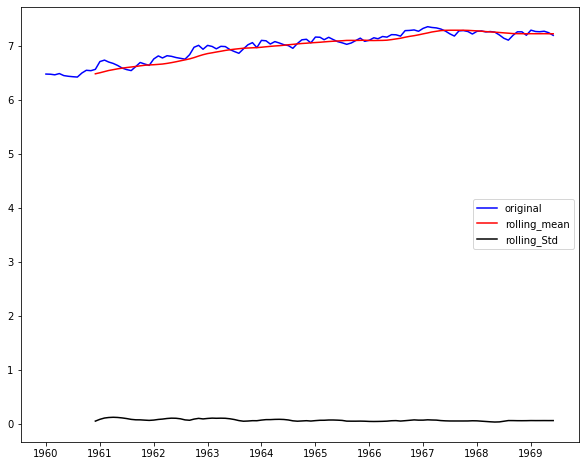

In [17]:
#checking for stationarity on the logs data
rides_stationarytest(rides_log)

Test Statistic                  -2.047539
p-value                          0.266126
#Lags Used                      11.000000
Number of Observations Used    101.000000
Critial Value 1%                -3.496818
Critial Value 5%                -2.890611
Critial Value 10%               -2.582277
dtype: float64


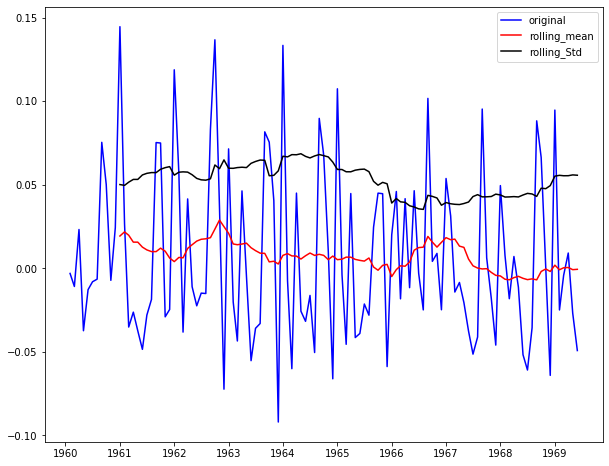

In [43]:
#applying shift or first order differencing on the data to get the error terms
rideslog_shift = rides_log - rides_log.shift()
rideslog_shift.dropna(inplace=True)
rideslog_shift.head()
rides_stationarytest(rideslog_shift)

In [19]:
a = rides_log.diff(periods =1)
a.dropna(inplace=True)
a.head()

,average_rides
1960-02-01,-0.003091
1960-03-01,-0.010895
1960-04-01,0.023203
1960-05-01,-0.037388
1960-06-01,-0.012780


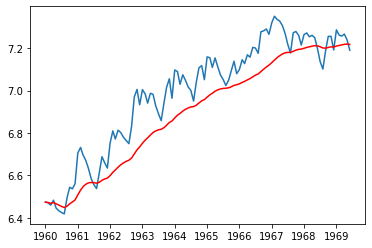

In [20]:
#applying exponential weighted moving average 
rides_ewm = rides_log.ewm(halflife=12).mean()
plt.plot(rides_log)
plt.plot(rides_ewm,color = 'red')

Test Statistic                  -1.344670
p-value                          0.608496
#Lags Used                      13.000000
Number of Observations Used    100.000000
Critial Value 1%                -3.497501
Critial Value 5%                -2.890906
Critial Value 10%               -2.582435
dtype: float64


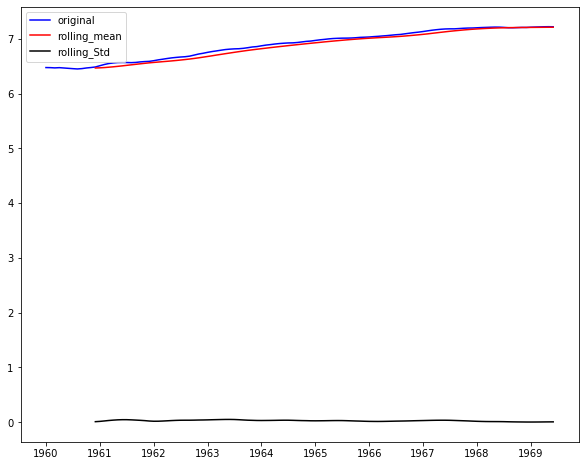

In [21]:
rides_stationarytest(rides_ewm)

Test Statistic                  -1.919681
p-value                          0.322860
#Lags Used                       0.000000
Number of Observations Used    101.000000
Critial Value 1%                -3.496818
Critial Value 5%                -2.890611
Critial Value 10%               -2.582277
dtype: float64


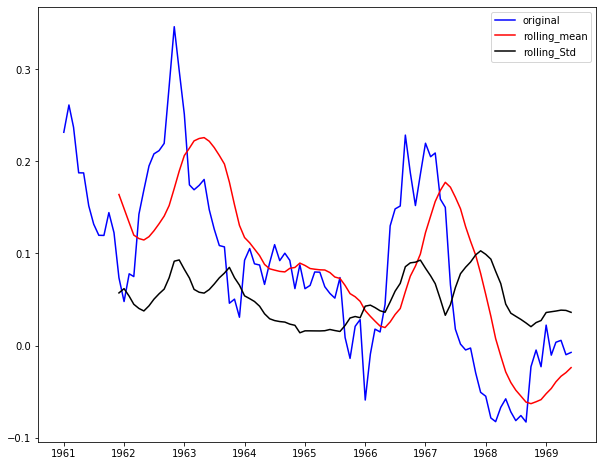

In [22]:
rides_shift = rides_log - rides_log.shift(12)
rides_shift.dropna(inplace = True)
rides_stationarytest(rides_shift)

Test Statistic                 -4.300230
p-value                         0.000444
#Lags Used                      8.000000
Number of Observations Used    93.000000
Critial Value 1%               -3.502705
Critial Value 5%               -2.893158
Critial Value 10%              -2.583637
dtype: float64


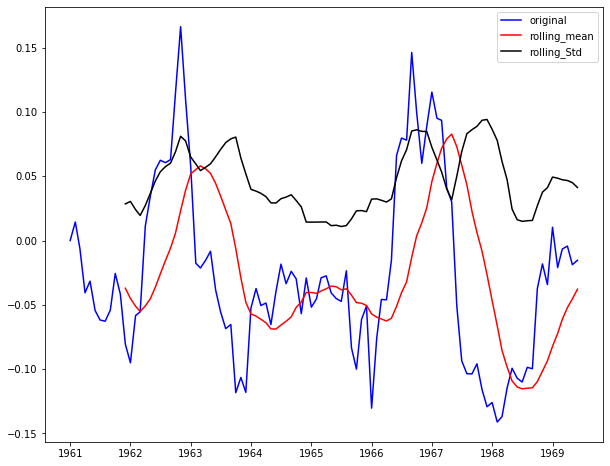

In [23]:
rides_shift_diff = rides_shift - rides_shift.ewm(halflife = 12).mean()
rides_shift_diff.dropna(inplace = True)
rides_stationarytest(rides_shift_diff)

In [45]:
rides_shift_diff.head()

,average_rides
1961-01-01,0.000000
1961-02-01,0.014403
1961-03-01,-0.006394
1961-04-01,-0.040666
1961-05-01,-0.031614


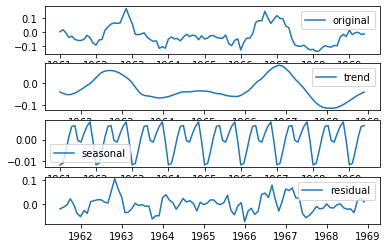

In [24]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(rides_shift_diff)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(rides_shift_diff,label = 'original')
plt.legend(loc= 'best')

plt.subplot(412)
plt.plot(trend,label = 'trend')
plt.legend(loc= 'best')

plt.subplot(413)
plt.plot(seasonal,label = 'seasonal')
plt.legend(loc= 'best')

plt.subplot(414)
plt.plot(residual,label = 'residual')
plt.legend(loc= 'best')

In [76]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

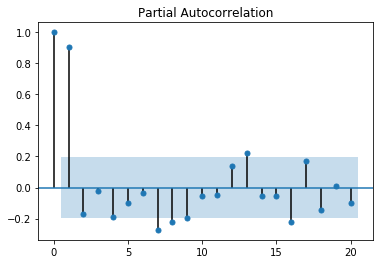

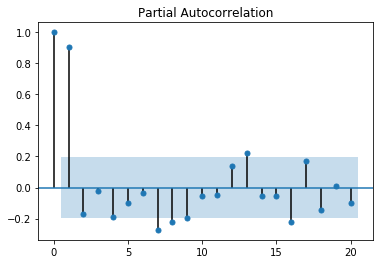

In [26]:
plot_pacf(rides_shift_diff,lags = 20)

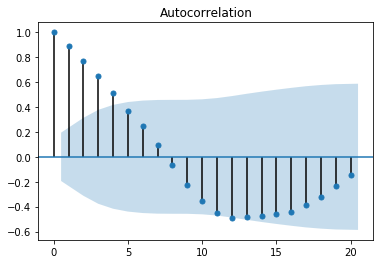

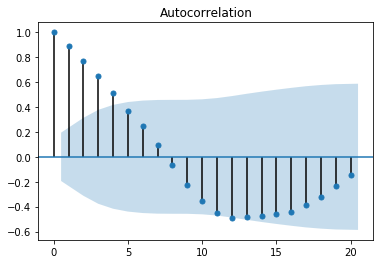

In [27]:
plot_acf(rides_shift_diff,lags = 20)

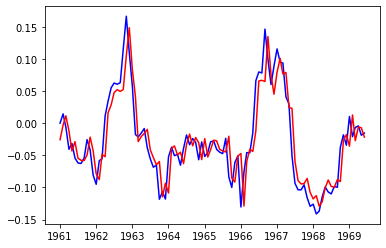

In [54]:
#implementing ARIMA model
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
model = ARIMA(rides_shift_diff,order = (1,0,1)).fit(disp = -1)
result = model.fittedvalues
plt.plot(rides_shift_diff,color = 'blue')
plt.plot(result,color = 'red')
#plt.title('RSS: %.4f'%sum((result - rideslog_shift['average_rides'])**2))

In [55]:
result.head(10)

1961-01-01   -0.025802
1961-02-01   -0.002882
1961-03-01    0.011343
1961-04-01   -0.012168
1961-05-01   -0.043226
1961-06-01   -0.028838
1961-07-01   -0.054523
1961-08-01   -0.057795
1961-09-01   -0.058185
1961-10-01   -0.049385
dtype: float64

In [56]:
ridespredict_cumsum = result.cumsum()
ridespredict_cumsum.head()

1961-01-01   -0.025802
1961-02-01   -0.028684
1961-03-01   -0.017341
1961-04-01   -0.029509
1961-05-01   -0.072736
dtype: float64

In [57]:
rides_ARIMA = pd.Series(rides_log['average_rides'].iloc[0],index = rides_log.index)
ridespredict_final = rides_ARIMA.add(ridespredict_cumsum,fill_value = 0)
ridespredict_final.head(20)

1960-01-01    6.473891
1960-02-01    6.473891
1960-03-01    6.473891
1960-04-01    6.473891
1960-05-01    6.473891
1960-06-01    6.473891
1960-07-01    6.473891
1960-08-01    6.473891
1960-09-01    6.473891
1960-10-01    6.473891
1960-11-01    6.473891
1960-12-01    6.473891
1961-01-01    6.448089
1961-02-01    6.445207
1961-03-01    6.456549
1961-04-01    6.444381
1961-05-01    6.401155
1961-06-01    6.372316
1961-07-01    6.317794
1961-08-01    6.259999
dtype: float64

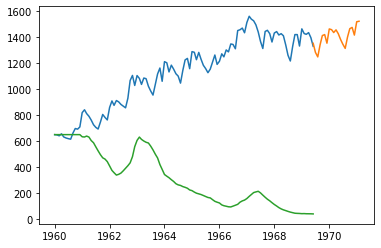

In [58]:
#ARIMA model doesn't seem to give accurate prediction hence we are moving to SARIMA model in next phase
final_rides_prediction = np.exp(ridespredict_final)
plt.plot(rides)
plt.plot(final_rides_prediction)

In [59]:
final_rides_prediction.head()

1960-01-01    648.0
1960-02-01    648.0
1960-03-01    648.0
1960-04-01    648.0
1960-05-01    648.0
dtype: float64

In [60]:
rides.head()

,average_rides,forecast
1960-01-01,648,NaN
1960-02-01,646,NaN
1960-03-01,639,NaN
1960-04-01,654,NaN
1960-05-01,630,NaN


In [35]:
#model.plot_predict(1,200)

In [36]:
#applying SRIMA model
import warnings
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
p = d = q = range(0, 2)

In [37]:
pdq = list(itertools.product(p,d,q))
seasonal_pdq = [(x[0],x[1],x[2],12) for x in list(itertools.product(p,d,q))]
warnings.filterwarnings('ignore')
for param in pdq:
    for param_seasonal in seasonal_pdq:
        model = sm.tsa.statespace.SARIMAX(rides.average_rides,order = param,seasonal_order = param_seasonal)
        result = model.fit()
        print('AR{} x{} -- AIC{}'.format(param,param_seasonal,result.aic))
        

AR(0, 0, 0) x(0, 0, 0, 12) -- AIC1932.8555299307025
AR(0, 0, 0) x(0, 0, 1, 12) -- AIC1819.7528651873854
AR(0, 0, 0) x(0, 1, 0, 12) -- AIC1289.6610642639555
AR(0, 0, 0) x(0, 1, 1, 12) -- AIC1286.49288456486
AR(0, 0, 0) x(1, 0, 0, 12) -- AIC1492.8684184114275
AR(0, 0, 0) x(1, 0, 1, 12) -- AIC1489.6905933714006
AR(0, 0, 0) x(1, 1, 0, 12) -- AIC1282.9020097149757
AR(0, 0, 0) x(1, 1, 1, 12) -- AIC1270.6080242074272
AR(0, 0, 1) x(0, 0, 0, 12) -- AIC1791.5613961261304
AR(0, 0, 1) x(0, 0, 1, 12) -- AIC1679.311721330069
AR(0, 0, 1) x(0, 1, 0, 12) -- AIC1185.4368402432724
AR(0, 0, 1) x(0, 1, 1, 12) -- AIC1183.8233593987466
AR(0, 0, 1) x(1, 0, 0, 12) -- AIC1422.8264461163596
AR(0, 0, 1) x(1, 0, 1, 12) -- AIC1748.371672303936
AR(0, 0, 1) x(1, 1, 0, 12) -- AIC1182.064294522381
AR(0, 0, 1) x(1, 1, 1, 12) -- AIC1173.5460659181892
AR(0, 1, 0) x(0, 0, 0, 12) -- AIC1236.2538473855816
AR(0, 1, 0) x(0, 0, 1, 12) -- AIC1189.325942591479
AR(0, 1, 0) x(0, 1, 0, 12) -- AIC1026.5644474915327
AR(0, 1, 0) x(0, 1

In [39]:
mod = sm.tsa.statespace.SARIMAX(rides.average_rides, order=(0, 1,0 ), seasonal_order=(1,1,1,12))
results = mod.fit()
print (results.summary())

                                 Statespace Model Results                                 
Dep. Variable:                      average_rides   No. Observations:                  114
Model:             SARIMAX(0, 1, 0)x(1, 1, 1, 12)   Log Likelihood                -501.340
Date:                            Fri, 24 Apr 2020   AIC                           1008.680
Time:                                    16:39:43   BIC                           1016.526
Sample:                                01-01-1960   HQIC                          1011.856
                                     - 06-01-1969                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12       0.3236      0.186      1.739      0.082      -0.041       0.688
ma.S.L12      -0.9990     41.906   

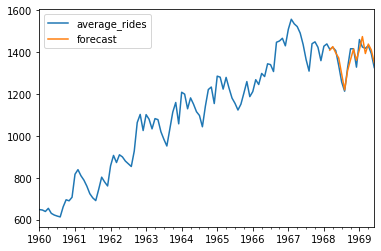

In [40]:
rides['forecast'] = results.predict(start = 98,end = 114)
rides[['average_rides','forecast']].plot()

In [41]:
start = datetime.datetime.strptime("1969-07-01","%Y-%m-%d")
datelist = [start + relativedelta(months = x) for x in range(0,20)]
forecast = pd.DataFrame(index = datelist,columns = rides.columns)
rides = pd.concat([rides,forecast])
rides.tail()

,average_rides,forecast
1970-10-01,NaN,NaN
1970-11-01,NaN,NaN
1970-12-01,NaN,NaN
1971-01-01,NaN,NaN
1971-02-01,NaN,NaN


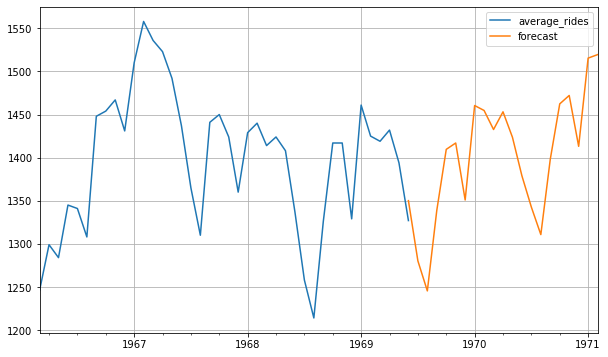

In [42]:
rides['forecast'] = results.predict(start = 113,end = 133)
rides[['average_rides', 'forecast']].ix[-60:].plot(figsize=(10, 6)) 
plt.grid(True)

In [ ]:
rides.tail(25)